In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path=os.listdir('/content/drive/MyDrive/Psoriasis123')
classes={'YES':1,'NO':0}

In [5]:
X=[]
Y=[]
for i in classes:
  path1='/content/drive/MyDrive/Psoriasis123/'+i
  for j in os.listdir(path1):
    img=cv2.imread(path1+'/'+j,0)
    img=cv2.resize(img,(180,180))
    X.append(img)
    Y.append(classes[i])

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
X=np.array(X)
Y=np.array(Y)

In [8]:
print(X)

[[[  7   7   8 ... 156 156 158]
  [  7   7   8 ... 160 156 158]
  [  7   7   8 ... 156 154 162]
  ...
  [  7   7   7 ... 127 128 129]
  [  7   7   7 ... 127 128 125]
  [  7   7   7 ... 121 131 129]]

 [[ 16  16  16 ...  15  15  15]
  [ 16  16  16 ...  16  16  16]
  [ 16  16  16 ...  16  16  16]
  ...
  [ 18  18  18 ...  16  16  16]
  [ 16  16  16 ...  16  16  16]
  [ 16  16  16 ...  16  16  16]]

 [[ 57  57  63 ...   6   6   6]
  [ 66  65  64 ...   6   6   5]
  [ 79  79  77 ...   8   4   4]
  ...
  [  6   6   7 ...   6   6   6]
  [  7   7   7 ...   6   6   6]
  [  6   6   6 ...   6   6   6]]

 ...

 [[217 219 222 ... 203 210 217]
  [220 222 224 ... 199 202 207]
  [224 225 227 ... 199 199 202]
  ...
  [255 255 255 ... 231 232 232]
  [255 255 255 ... 229 230 230]
  [255 255 255 ... 228 228 229]]

 [[118 120 123 ... 162 163 164]
  [117 119 122 ... 159 159 159]
  [116 118 121 ... 157 157 157]
  ...
  [  9   9  10 ... 167 167 167]
  [  9   9  10 ... 167 167 167]
  [  9   9   9 ... 167 167 1

In [9]:
print(Y)

[1 1 1 ... 0 0 0]


In [10]:
pd.Series(Y).value_counts()

1    1752
0    1054
dtype: int64

In [11]:
X.shape

(2806, 180, 180)

In [12]:
Y.shape

(2806,)

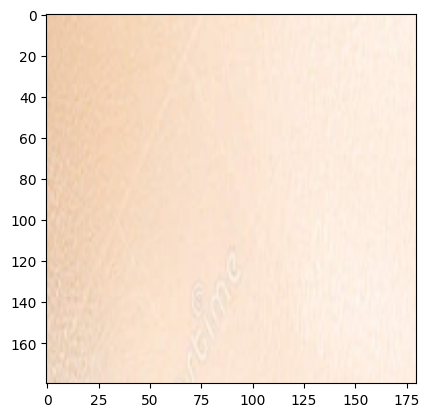

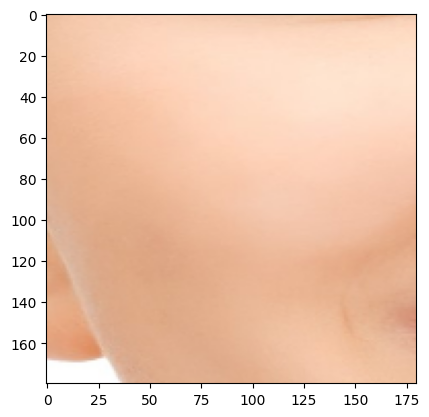

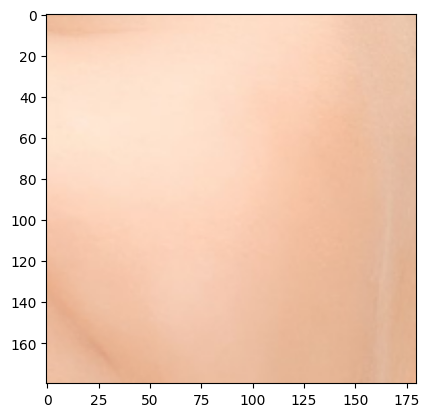

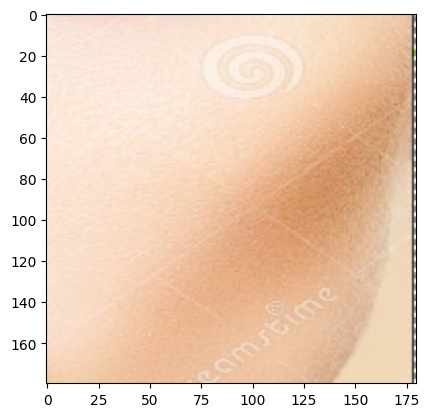

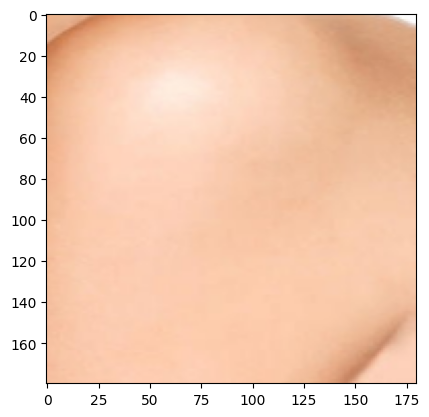

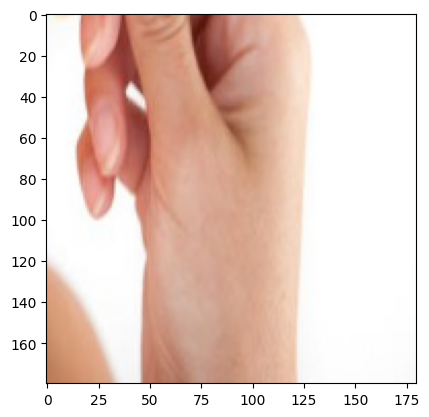

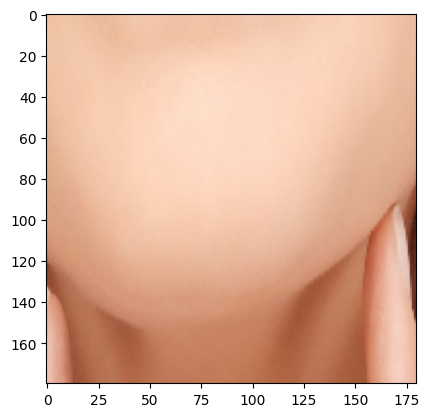

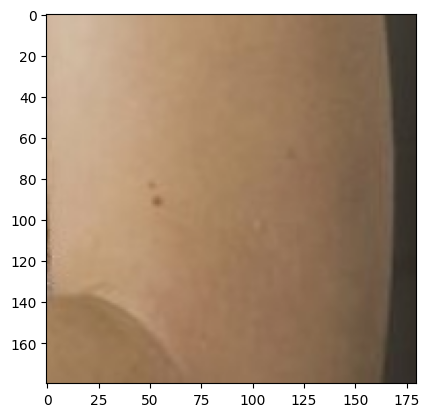

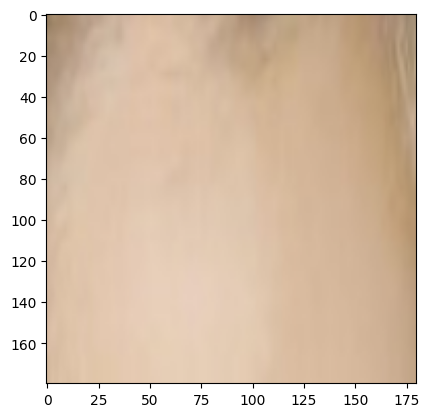

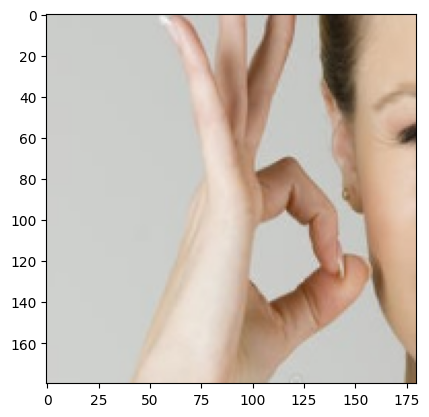

In [ ]:
import os
path2="/content/drive/MyDrive/Psoriasis123/NO"
img_data2=[]
count=0
images=os.listdir(path2)
for img in images:
    img_arr1=cv2.imread(os.path.join(path2,img))
    img_arr1=cv2.resize(img_arr1,(180,180))
    img_data2.append(img_arr1)
    converted = cv2.cvtColor(img_arr1,cv2.COLOR_BGR2RGB)
    plt.figure()
    count=count+1
    plt.imshow(converted,cmap='gray')
    if count==10:
      break

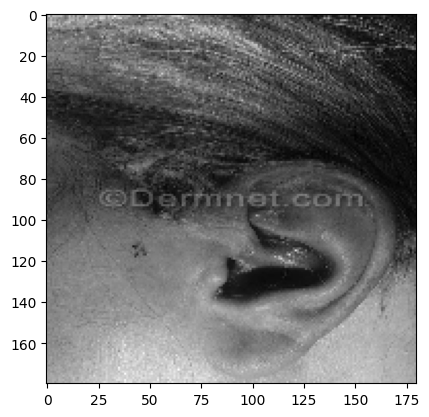

In [ ]:
plt.imshow(X[500],cmap='gray')

In [13]:
X=X.reshape(len(X),-1)
X.shape

(2806, 32400)

LOGISTIC REGRESSION

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test, Y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9661921708185054
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       218
           1       0.97      0.98      0.97       344

    accuracy                           0.97       562
   macro avg       0.97      0.96      0.96       562
weighted avg       0.97      0.97      0.97       562



In [15]:
pred=model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[206,  12],
       [  7, 337]])

Text(95.72222222222221, 0.5, 'Truth values')

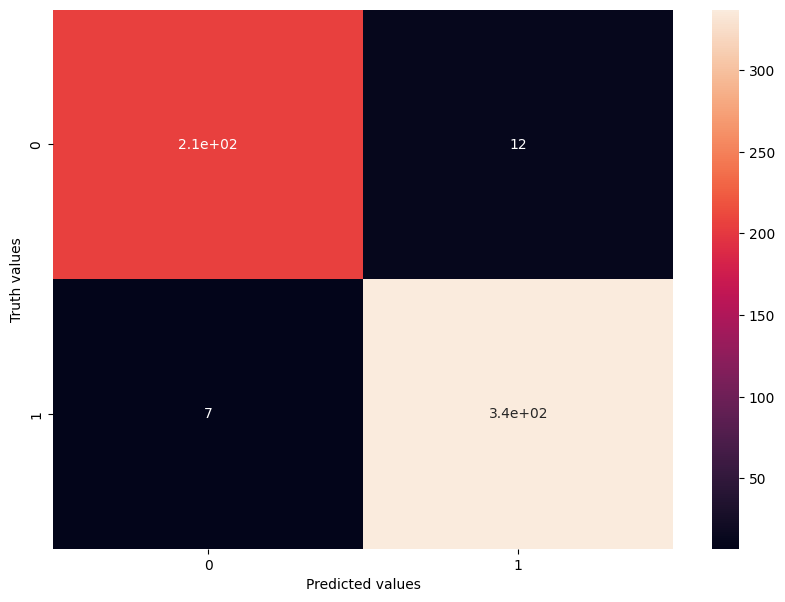

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

KNN

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.92%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[206,  12],
       [  7, 337]])

Text(95.72222222222221, 0.5, 'Truth values')

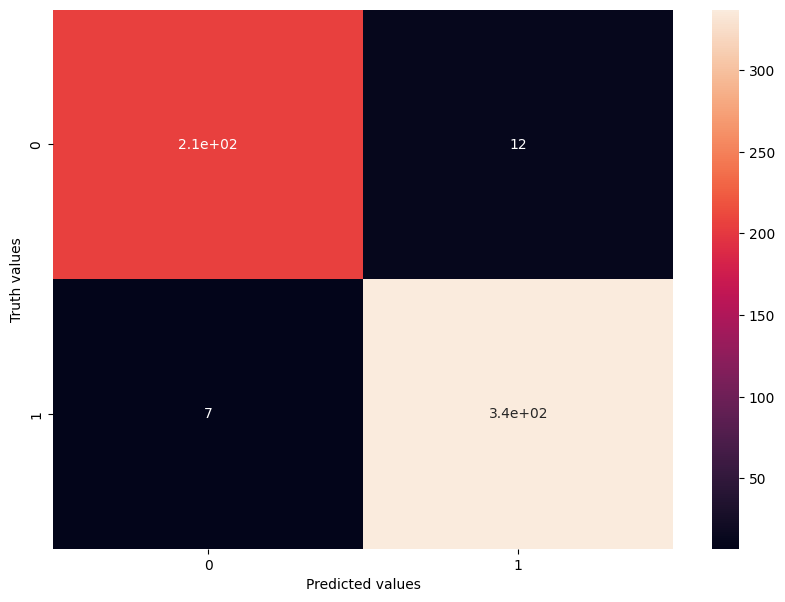

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9163701067615658


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[153,  65],
       [ 31, 313]])

Text(95.72222222222221, 0.5, 'Truth values')

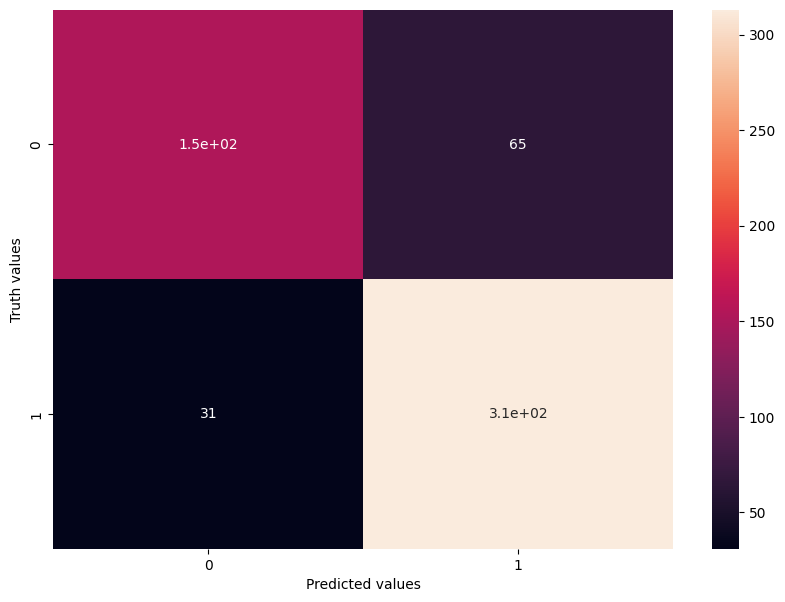

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

RANDOM FOREST

In [ ]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9288256227758007
Confusion Matrix:
[[199  19]
 [ 21 323]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       218
           1       0.94      0.94      0.94       344

    accuracy                           0.93       562
   macro avg       0.92      0.93      0.93       562
weighted avg       0.93      0.93      0.93       562



SVM

In [ ]:

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.99644128113879


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[218,   0],
       [  2, 342]])

Text(95.72222222222221, 0.5, 'Truth values')

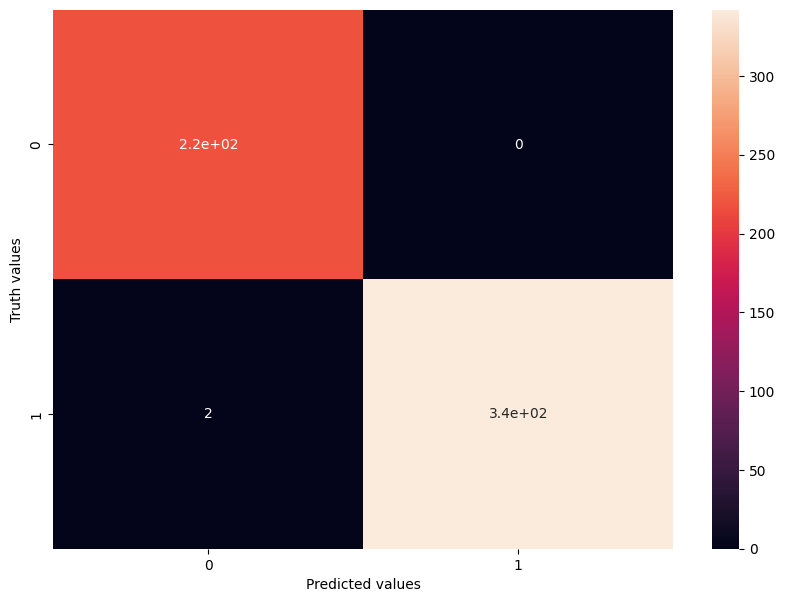

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, Y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(Y_test, bagging_pred)
print("Bagging Accuracy:", bagging_accuracy)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, Y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(Y_test, adaboost_pred)
print("AdaBoost Accuracy:", adaboost_accuracy)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test, random_forest_pred)
print("Random Forest Accuracy:", random_forest_accuracy)


Bagging Accuracy: 0.9359430604982206
AdaBoost Accuracy: 0.9163701067615658
Random Forest Accuracy: 0.9288256227758007
